In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from os import system

In [2]:
df=pd.read_csv("RF_Dataset1_heart_v2.csv")

In [3]:
df.head()

,age,sex,BP,cholestrol,heart disease
0,70,1,130,322,1
1,67,0,115,564,0
2,57,1,124,261,1
3,64,1,128,263,0
4,74,0,120,269,0


In [4]:
df.isnull().sum()

age              0
sex              0
BP               0
cholestrol       0
heart disease    0
dtype: int64

In [5]:
pre_x=df[['age','sex','BP','cholestrol']]
y=df[['heart disease']]

In [6]:
labelEncoder = LabelEncoder()

for col in pre_x.columns:
    df[col]=labelEncoder.fit_transform(df[col])

In [7]:
x=df[['age','sex','BP','cholestrol']]

In [8]:
classes=y['heart disease'].unique()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
clf = tree.DecisionTreeClassifier(random_state=0)
clf=clf.fit(x_train,y_train)

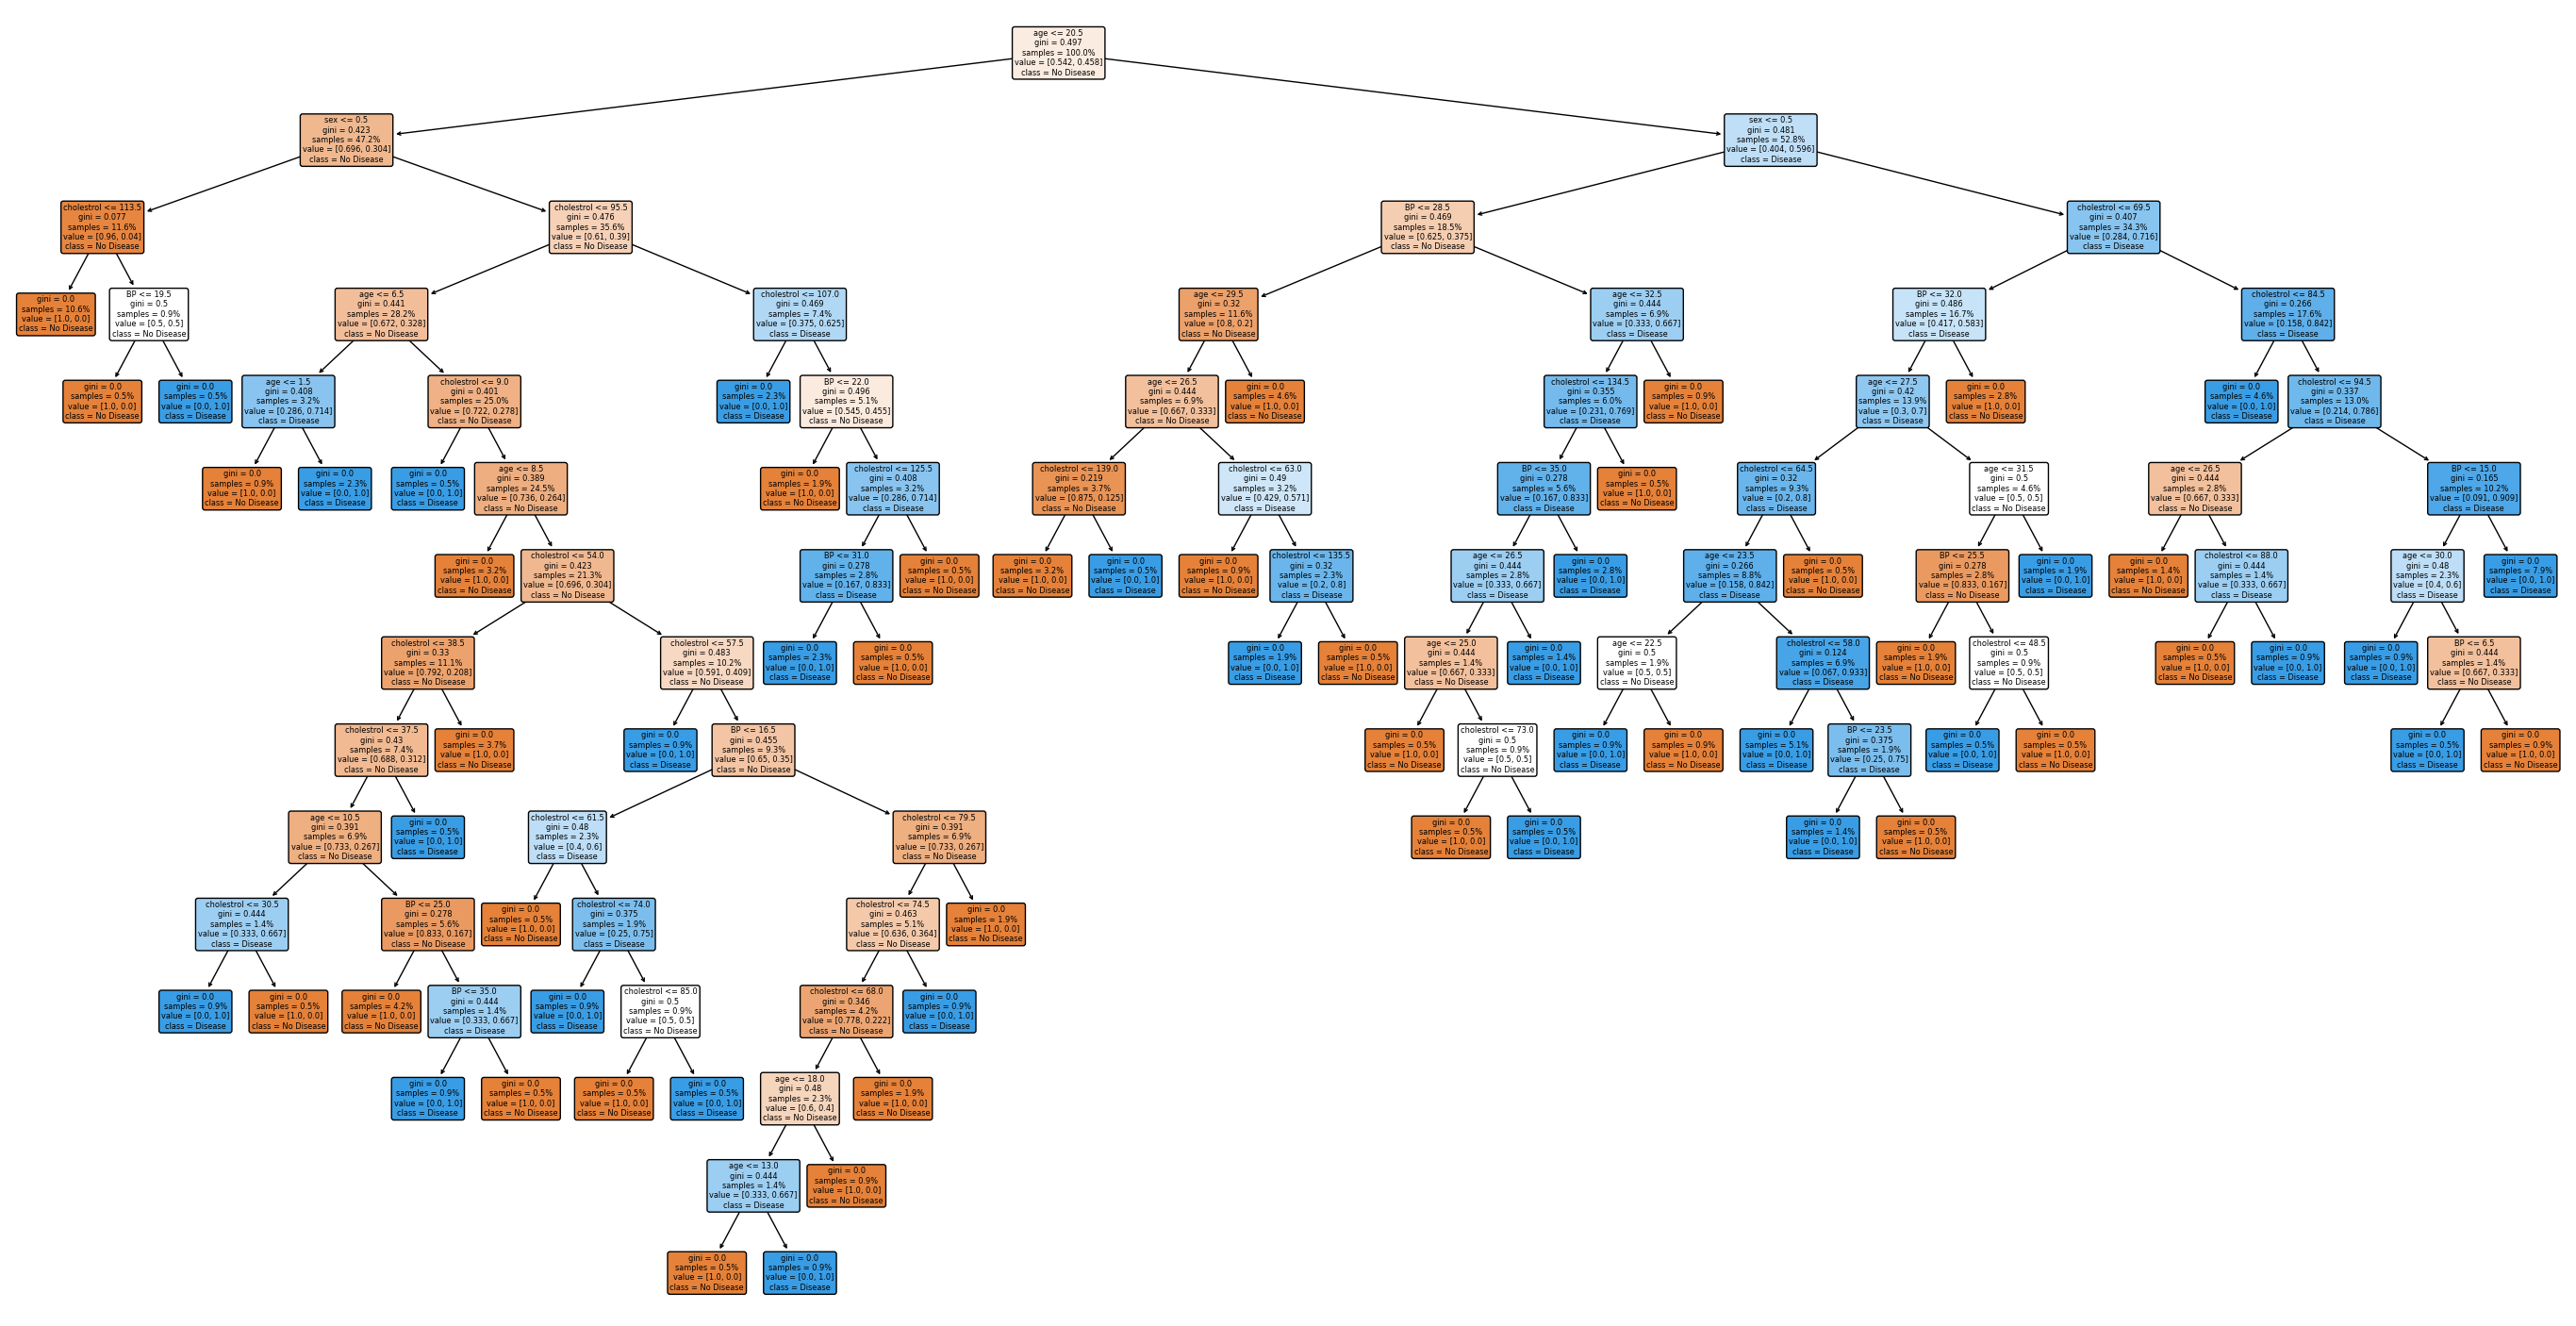

In [11]:
plt.figure(figsize=(35, 18))
tree.plot_tree(clf, feature_names=x.columns.to_list(), class_names=['No Disease', 'Disease'], filled=True, rounded=True,proportion=True)
plt.show()

In [12]:
y_pred=clf.predict(x_test)

In [13]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.6296296296296297


In [14]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[20  7]
 [13 14]]


In [15]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.74      0.61      0.67        33
           1       0.52      0.67      0.58        21

    accuracy                           0.63        54
   macro avg       0.63      0.64      0.62        54
weighted avg       0.65      0.63      0.63        54



In [16]:
with open("heartDisease.txt","w") as f:
    f=tree.export_graphviz(clf,out_file=f)

# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

/Users/amitanand/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

[Text(0.47716346153846156, 0.9642857142857143, 'x[2] <= 42.0\ngini = 0.496\nsamples = 137\nvalue = [118, 98]'),
 Text(0.4579326923076923, 0.8928571428571429, 'x[0] <= 19.5\ngini = 0.492\nsamples = 133\nvalue = [118, 91]'),
 Text(0.13701923076923078, 0.8214285714285714, 'x[1] <= 0.5\ngini = 0.42\nsamples = 55\nvalue = [63, 27]'),
 Text(0.0673076923076923, 0.75, 'x[3] <= 113.5\ngini = 0.069\nsamples = 14\nvalue = [27, 1]'),
 Text(0.04807692307692308, 0.6785714285714286, 'gini = 0.0\nsamples = 12\nvalue = [26, 0]'),
 Text(0.08653846153846154, 0.6785714285714286, 'x[0] <= 12.0\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.0673076923076923, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.10576923076923077, 0.6071428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.20673076923076922, 0.75, 'x[3] <= 12.0\ngini = 0.487\nsamples = 41\nvalue = [36, 26]'),
 Text(0.1875, 0.6785714285714286, 'gini = 0.0\nsamples = 3\nvalue = [0, 6]'),
 Text(0.2259615384615

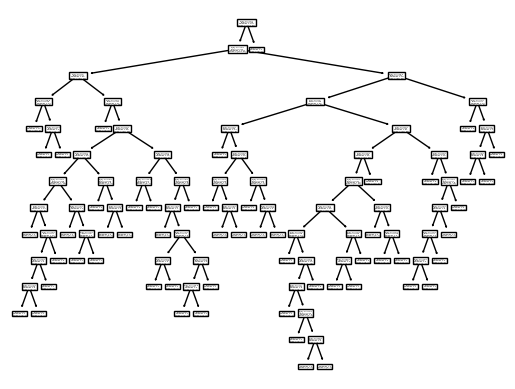

In [19]:
tree.plot_tree(rf.estimators_[0])

In [20]:
y_pred=rf.predict(x_test)

In [21]:
acc=accuracy_score(y_test,y_pred)
print(f"Accuracy is {acc}")

Accuracy is 0.5925925925925926


In [22]:
cm = confusion_matrix(y_pred,y_test)
print(cm)

[[22 11]
 [11 10]]


In [23]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        33
           1       0.48      0.48      0.48        21

    accuracy                           0.59        54
   macro avg       0.57      0.57      0.57        54
weighted avg       0.59      0.59      0.59        54



In [24]:
with open("heartDiseaseRF.txt","w") as f:
    f=tree.export_graphviz(rf.estimators_[0],out_file=f)